In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = "C:\\Mousita's\\ML\\datasets\\Breast_cancer\\breast_cancer_bd.csv"

df = pd.read_csv(data)

In [3]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# view dimensions of dataset

df.shape

(699, 11)

Drop redundant columns
We should drop any redundant columns from the dataset which does not have any predictive power. Here, Sample code number is the redundant column. So, I will drop it first.

In [5]:
# drop Sample code number column from dataset

df.drop('Sample code number', axis=1, inplace=True)

In [6]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [7]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [8]:
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

We can see that there are 9 numerical variables and 1 categorical variable in the dataset. I will check the frequency distribution of values in the variables to confirm the same.

In [9]:
for var in df.columns:
    
    print(df[var].value_counts())

Clump Thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity of Cell Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity of Cell Shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single Epithelial Cell Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6    

The distribution of values shows that data type of Bare_Nuclei is of type integer. But the summary of the dataframe shows that it is type object. So, I will explicitly convert its data type to numeric.

In [10]:
# converting Bare_Nuclei to numeric
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')

In [11]:
df.dtypes

Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

Summary of variables¶
There are 10 numerical variables in the dataset.
All of the variables are of discrete type.
Out of all the 10 variables, the first 9 variables are feature variables and last variable Class is the target variable.

In [12]:
# find missing value
df.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [13]:
# check frequency distribution of `Bare_Nuclei` column

df['Bare Nuclei'].value_counts()

Bare Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [14]:
# check unique values in `Bare_Nuclei` column

df['Bare Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [15]:
# check for nan values in `Bare_Nuclei` column

df['Bare Nuclei'].isna().sum()

16

We can see that there are 16 nan values in the dataset. I will impute missing values after dividing the dataset into training and test set.

In [16]:
# view frequency distribution of values in `Class` variable

df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

We can see that the Class variable contains 2 class labels - 2 and 4. 2 stands for benign and 4 stands for malignant cancer.

In [17]:
# view summary statistics in numerical variables

print(round(df.describe(),2))

       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count           699.00                   699.00                    699.00   
mean              4.42                     3.13                      3.21   
std               2.82                     3.05                      2.97   
min               1.00                     1.00                      1.00   
25%               2.00                     1.00                      1.00   
50%               4.00                     1.00                      1.00   
75%               6.00                     5.00                      5.00   
max              10.00                    10.00                     10.00   

       Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00  

Steps to Identify Outliers from .describe()

Suppose you have this output:

       values
count   100.0
mean     52.3
std      10.5
min      30.0
25%      45.0
50%      52.0
75%      58.0
max     120.0
Calculate IQR
IQR=Q3−Q1=58−45=13
Determine Outlier Boundaries

Lower bound = Q1 - 1.5 × IQR = 45 - (1.5×13) = 25.5

Upper bound = Q3 + 1.5 × IQR = 58 + (1.5×13) = 77.5
Identify Outliers

Any value < 25.5 or > 77.5 is an outlier.

From the table: max = 120 → clear outlier

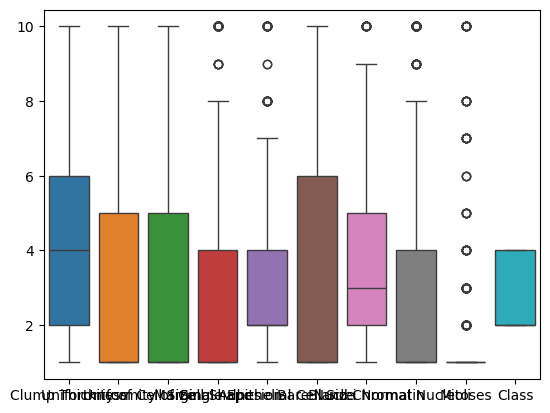

In [18]:
# draw boxplot to see the outliers
sns.boxplot(df)
plt.show()

Check the distribution of variables¶
Now, plot the histograms to check variable distributions to find out if they are normal or skewed.

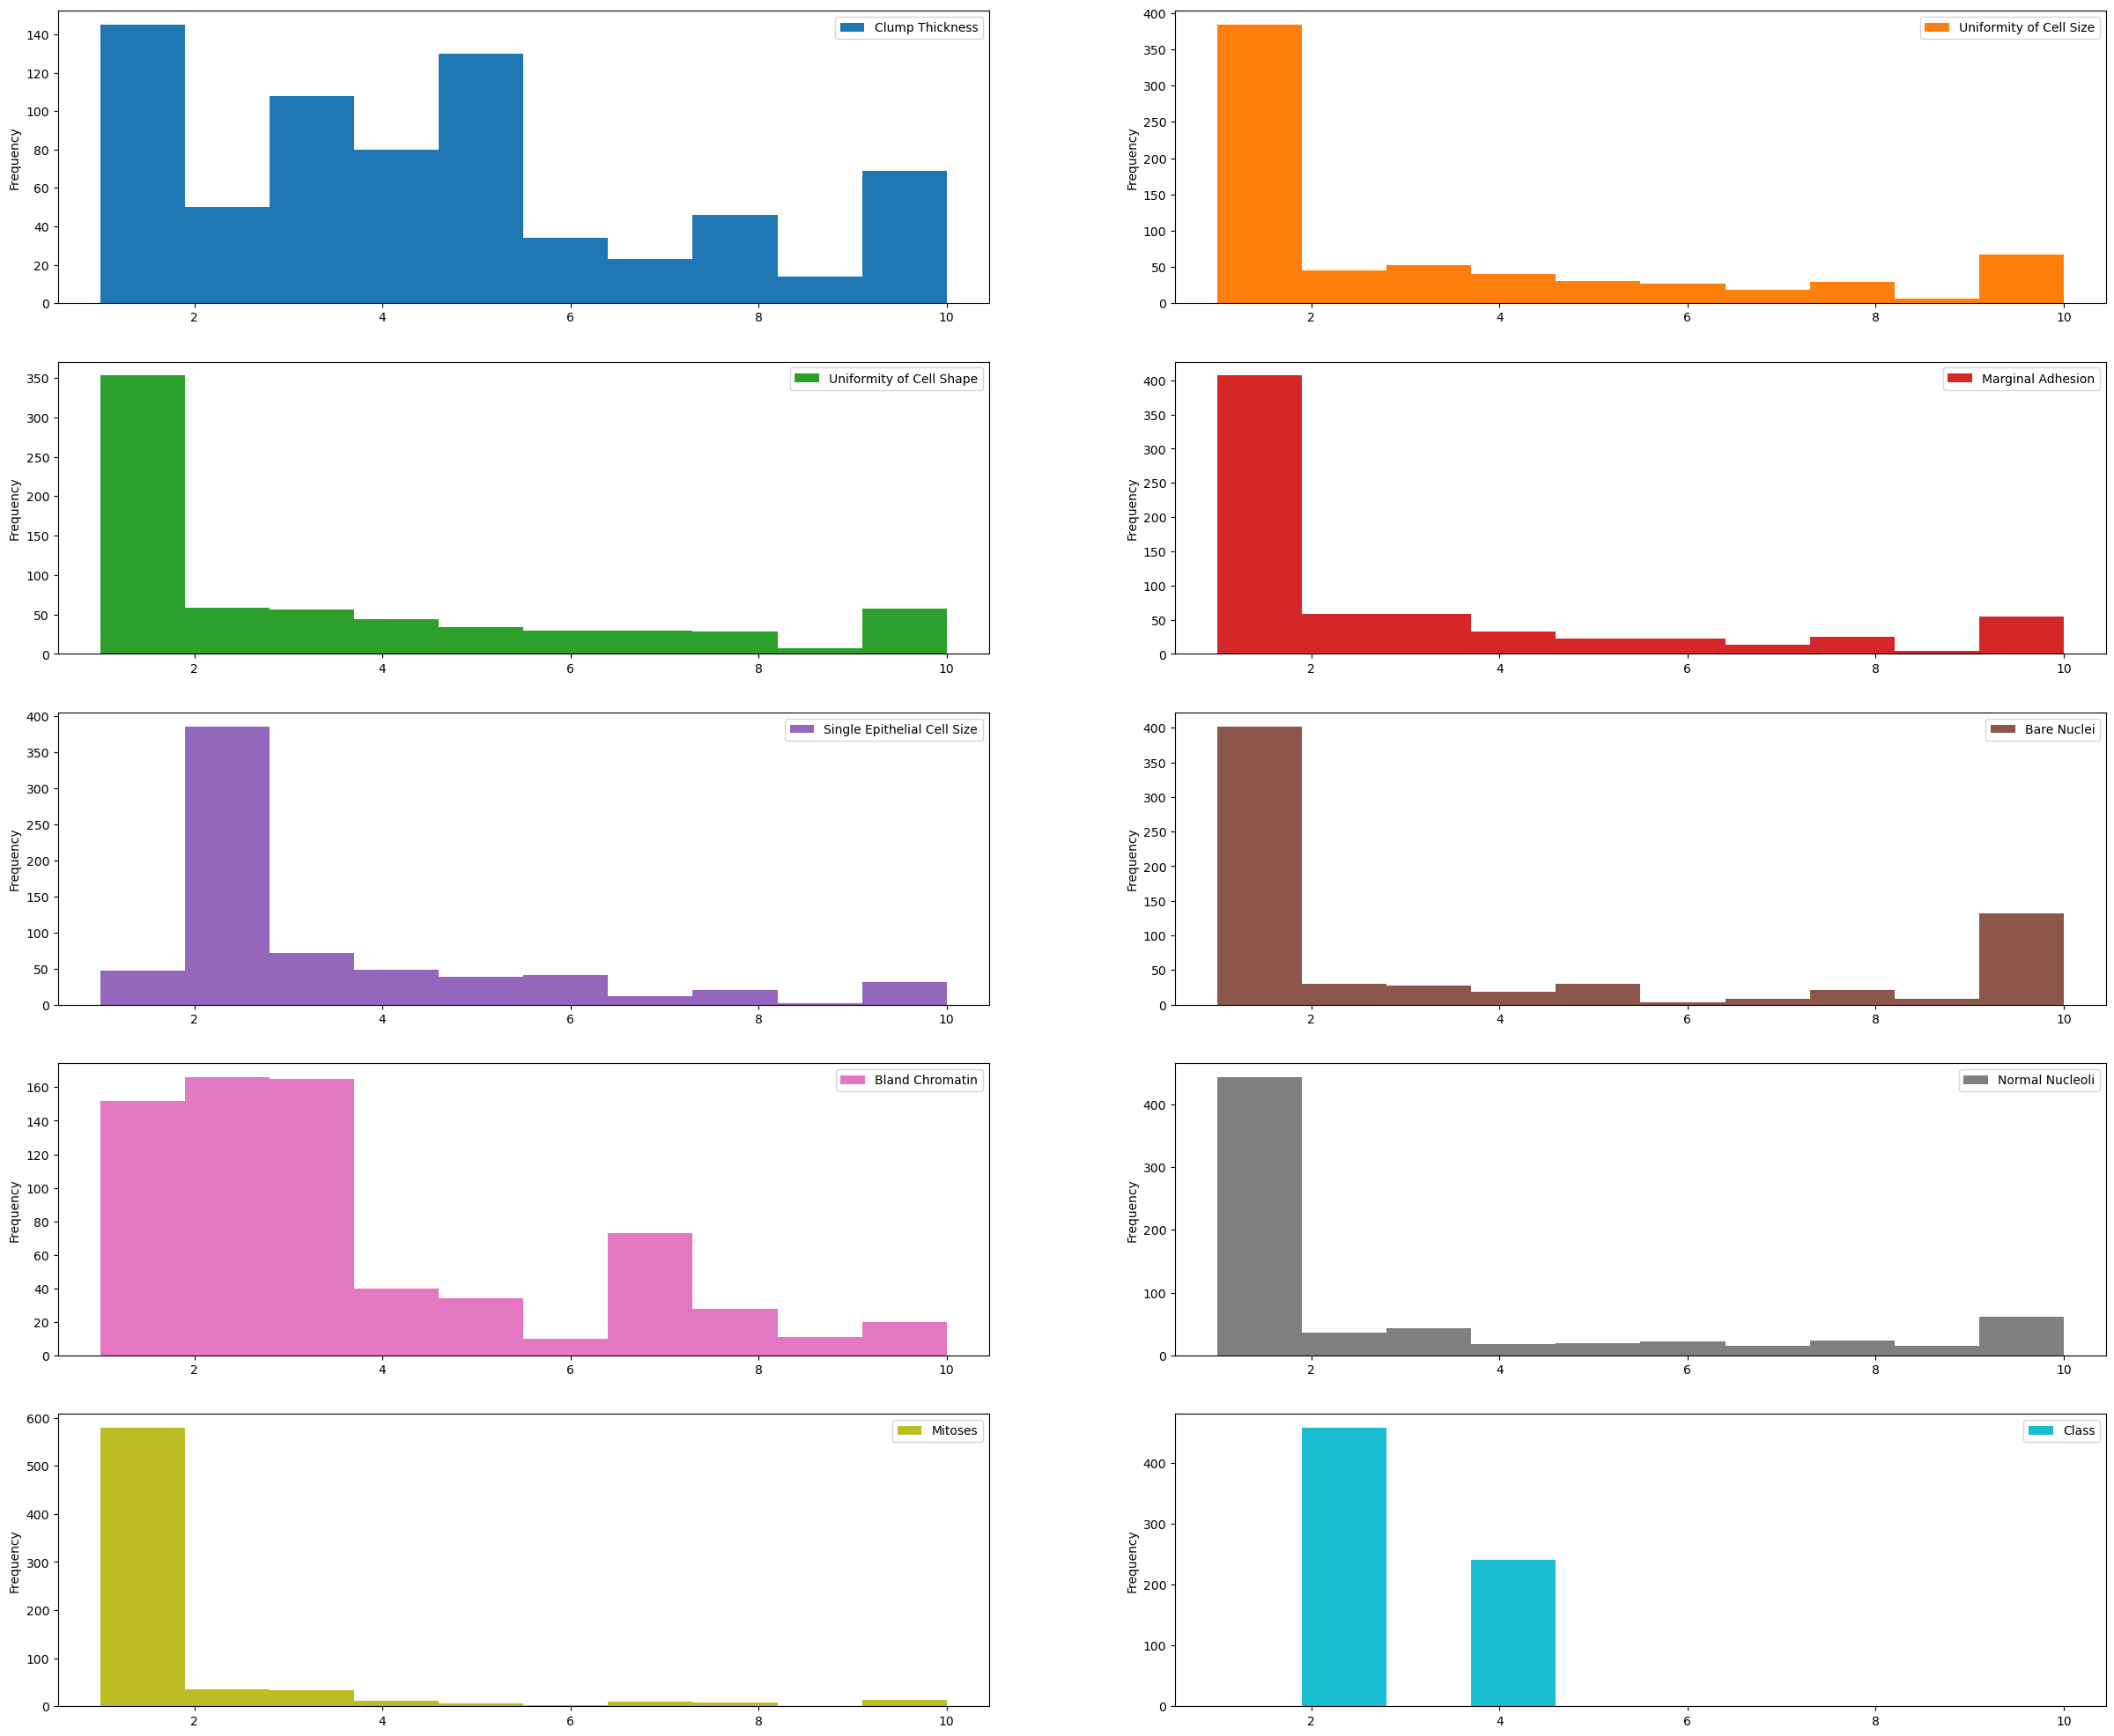

In [19]:
# plot histograms of the variables


plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

We can see that all the variables in the dataset are positively skewed.

Estimating correlation coefficients
Our dataset is very small. So, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. We can compute it using the df.corr() method as follows:-

In [20]:
correlation = df.corr()

In [21]:
correlation

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.822696,0.756616,0.712244,0.423170,1.000000


Our target variable is Class. So, we should check how each attribute correlates with the Class variable. We can do it as follows:-

In [22]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare Nuclei                    0.822696
Uniformity of Cell Shape       0.818934
Uniformity of Cell Size        0.817904
Bland Chromatin                0.756616
Clump Thickness                0.716001
Normal Nucleoli                0.712244
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

Interpretation¶
The correlation coefficient ranges from -1 to +1.

When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between Class and Bare_Nuclei, Class and Uniformity_Cell_Shape, Class and Uniformity_Cell_Size.

When it is clsoe to -1, it means that there is a strong negative correlation. When it is close to 0, it means that there is no correlation.

We can see that all the variables are positively correlated with Class variable. Some variables are strongly positive correlated while some variables are negatively correlated.

Discover patterns and relationships¶
An important step in EDA is to discover patterns and relationships between variables in the dataset. I will use the seaborn heatmap to explore the patterns and relationships in the dataset.

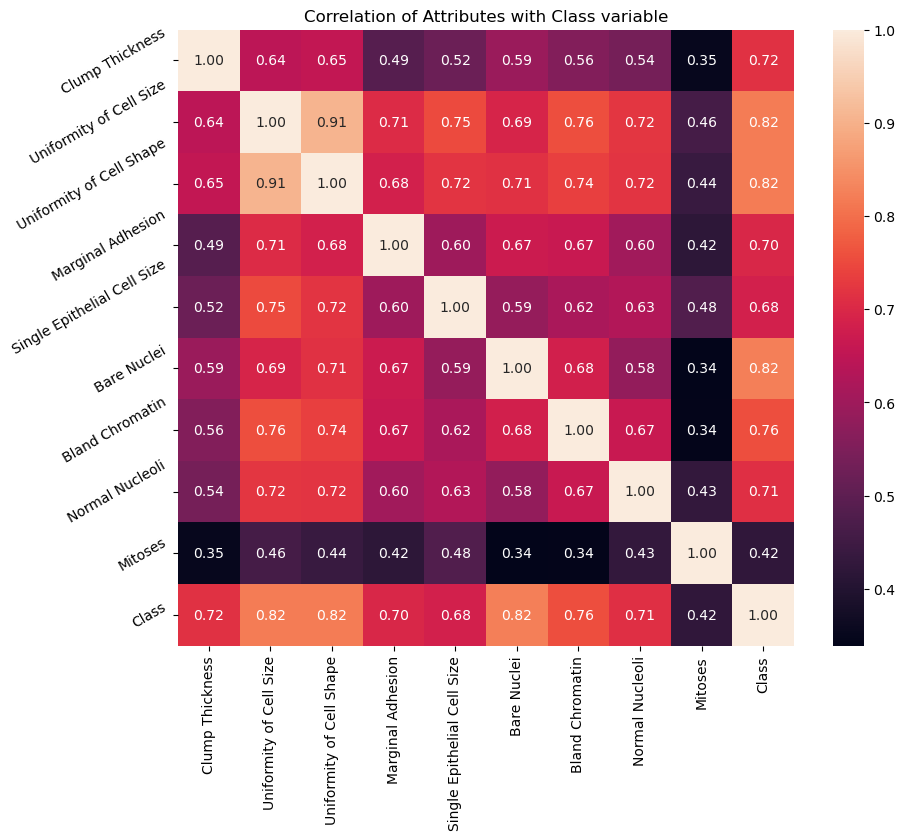

In [23]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

Interpretation¶
From the above correlation heat map, we can conclude that :-

Class is highly positive correlated with Uniformity_Cell_Size, Uniformity_Cell_Shape and Bare_Nuclei. (correlation coefficient = 0.82).

Class is positively correlated with Clump_thickness(correlation coefficient=0.72), Marginal_Adhesion(correlation coefficient=0.70), Single_Epithelial_Cell_Size)(correlation coefficient = 0.68) and Normal_Nucleoli(correlation coefficient=0.71).

Class is weekly positive correlated with Mitoses(correlation coefficient=0.42).

The Mitoses variable is weekly positive correlated with all the other variables(correlation coefficient < 0.50).

In [24]:
# find X and Y
X = df.drop(['Class'], axis=1)

y = df['Class']

In [73]:
X.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
dtype: int64

In [72]:
X.fillna(X.median(),inplace=True)

In [25]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((559, 9), (140, 9))

In [27]:
# check data types in X_train

X_train.dtypes

Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
dtype: object

In [28]:
# check missing values in numerical variables in X_train

X_train.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    13
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
dtype: int64

In [29]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    3
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
dtype: int64

In [30]:
# print percentage of missing values in the numerical variables in training set

for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Bare Nuclei 0.0233


Assumption¶
I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

Why Median is better when outliers exist

Mean is sensitive to outliers

Example: [10, 12, 11, 13, 200]

Mean = 49.2 (heavily pulled up by 200)

Median = 12 (represents central tendency much better).

Median is robust

Outliers do not affect median because it’s just the middle value.

So, if your dataset has extreme values, median is a more stable and representative measure.

In [31]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)  

C:\Users\Mousita\AppData\Local\Temp\ipykernel_20332\3792854074.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(col_median, inplace=True)


In [32]:
# check again missing values in numerical variables in X_train

X_train.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
dtype: int64

In [33]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
dtype: int64

In [34]:
X_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1


In [35]:
X_test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
476,4,1,2,1,2,1.0,1,1,1
531,4,2,2,1,2,1.0,2,1,1
40,6,6,6,9,6,1.0,7,8,1
432,5,1,1,1,2,1.0,2,2,1
14,8,7,5,10,7,9.0,5,5,4


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling.

Feature Scaling 

In [36]:
cols = X_train.columns

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [38]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [39]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [40]:
X_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


Fit K Neighbours Classifier to the training Set

In [41]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_pred = knn.predict(X_test)

y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

Check accuracy score 

In [43]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


Compare the train-set and test-set accuracy

In [44]:
y_pred_train = knn.predict(X_train)

In [45]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9821


In [46]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9821
Test set score: 0.9714


The training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting.

Compare model accuracy with null accuracy¶
So, the model accuracy is 0.9714. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [47]:
# check class distribution in test set

y_test.value_counts()

Class
2    85
4    55
Name: count, dtype: int64

We can see that the occurences of most frequent class is 85. So, we can calculate null accuracy by dividing 85 by total number of occurences.

In [48]:
# check null accuracy score

null_accuracy = (85/(85+55))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6071


We can see that our model accuracy score is 0.9714 but null accuracy score is 0.6071. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

Rebuild kNN Classification model using k=5

In [49]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9714


In [50]:
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9786


In [51]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9786


In [52]:
# instantiate the model with k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn_8.fit(X_train, y_train)


# predict on the test-set
y_pred_8 = knn_8.predict(X_test)


print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9786


In [53]:
# instantiate the model with k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_9.fit(X_train, y_train)


# predict on the test-set
y_pred_9 = knn_9.predict(X_test)


print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.9714


Interpretation
Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5. But, if we increase the value of k further, this would result in enhanced accuracy.

With k=6,7,8 we get accuracy score of 0.9786. So, it results in performance improvement.

If we increase k to 9, then accuracy decreases again to 0.9714.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

Confusion matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [54]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[83  2]
 [ 2 53]]

True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


The confusion matrix shows 83 + 53 = 136 correct predictions and 2 + 2 = 4 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 83
True Negatives (Actual Negative:0 and Predict Negative:0) - 53
False Positives (Actual Negative:0 but Predict Positive:1) - 2 (Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 2 (Type II error)

In [55]:
# Print the Confusion Matrix with k =7 and slice it into four pieces

cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)

print('\nTrue Positives(TP) = ', cm_7[0,0])

print('\nTrue Negatives(TN) = ', cm_7[1,1])

print('\nFalse Positives(FP) = ', cm_7[0,1])

print('\nFalse Negatives(FN) = ', cm_7[1,0])

Confusion matrix

 [[83  2]
 [ 1 54]]

True Positives(TP) =  83

True Negatives(TN) =  54

False Positives(FP) =  2

False Negatives(FN) =  1


Comment
So, kNN Classification model with k=7 shows more accurate predictions and less number of errors than k=3 model. Hence, we got performance improvement with k=7.

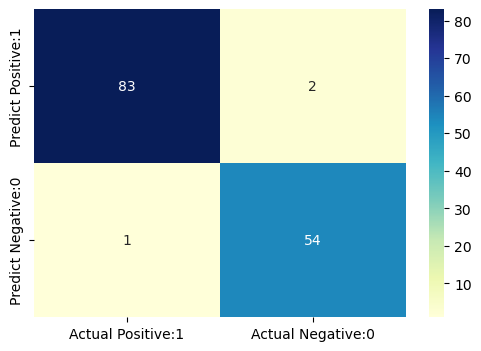

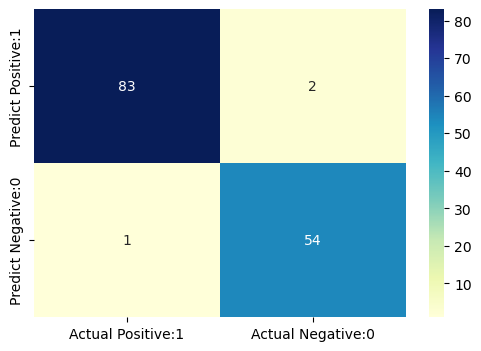

In [57]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

Classification Report¶
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [59]:
TP = cm_7[0,0]
TN = cm_7[1,1]
FP = cm_7[0,1]
FN = cm_7[1,0]

In [60]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9786


In [61]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0214


Precision¶
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [75]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9765


Recall¶
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [76]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9881


ROC Curve¶
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

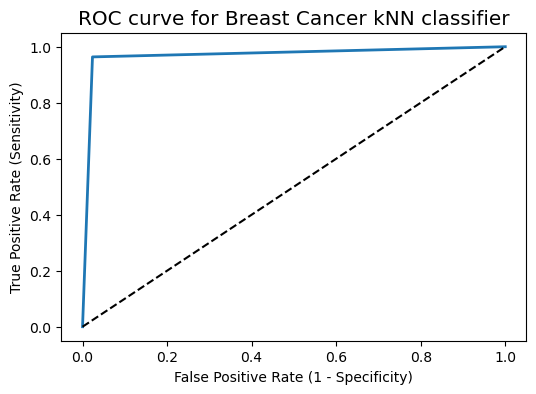

In [78]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

ROC AUC
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [80]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9701


Interpretation¶
ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it is benign or malignant cancer.

k-fold Cross Validation
In this section, I will apply k-fold Cross Validation technique to improve the model performance. Cross-validation is a statistical method of evaluating generalization performance It is more stable and thorough than using a train-test split to evaluate model performance.

In [81]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_7, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.875      0.96428571 0.94642857 0.98214286 0.96428571 0.96428571
 0.98214286 0.98214286 1.         0.98181818]


In [82]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9643


Interpretation¶
Using the mean cross-validation, we can conclude that we expect the model to be around 96.46 % accurate on average.

If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 87.72% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.

We can see that 10-fold cross-validation accuracy does not result in performance improvement for this model.

In [74]:
# to find the best K value using K fold cross validation
from sklearn.model_selection import cross_val_score
# Range of K values to try
k_values = range(1, 21)
cv_scores = []  # store mean accuracy for each K
# Cross-validation for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())
# Find the best K
best_k = k_values[np.argmax(cv_scores)]
print("Best K value:", best_k)
print("Cross-Validation Accuracy for best K:", max(cv_scores))

Best K value: 7
Cross-Validation Accuracy for best K: 0.9628365878725591


Results and Conclusion
1. In this project, I build a kNN classifier model to classify the patients suffering from breast cancer. The model yields very good performance as indicated by the model accuracy which was found to be 0.9786 with k=7.

2. With k=3, the training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting.

3. I have compared the model accuracy score which is 0.9714 with null accuracy score which is 0.6071. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

4. Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5. But, if we increase the value of k further, this would result in enhanced accuracy. With k=6,7,8 we get accuracy score of 0.9786. So, it results in performance improvement. If we increase k to 9, then accuracy decreases again to 0.9714. So, we can conclude that our optimal value of k is 7.

5. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it is benign or malignant cancer.

6. Using the mean cross-validation, we can conclude that we expect the model to be around 96.46 % accurate on average.

7. If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 87.72% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.